# Brun algorithm as a win-lose induction

We have implemented in package ``simplicial`` the graph defined in [Fou24b].

This notebook is to check the computations claiming that the win-lose induction on this graph is semiconjugated to Brun algorithm.

### Dimension 3

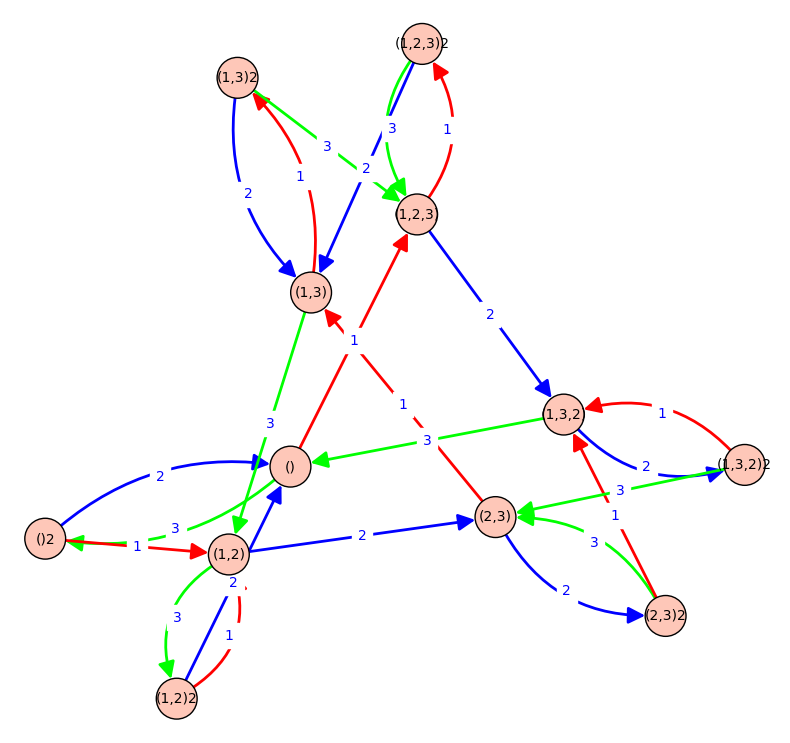

In [1]:
from simplicial import *
G = simplicial_systems.Brun(3)
G.plot().show(figsize=[8,8])

As noticed in the article, there is a smaller graph defining a win-lose induction which is also semi-conjugated to Brun algorithm. 

The method ``dynamical_core`` return such smaller graphs defining a semi-conjugated induction.

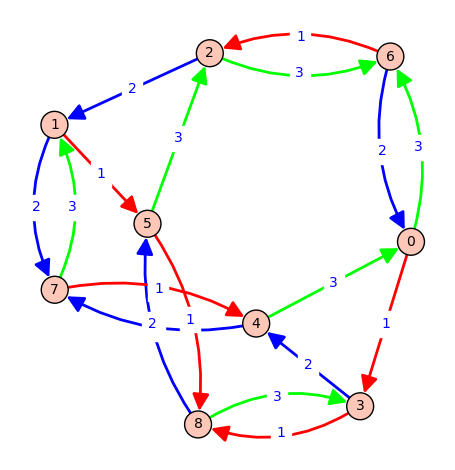

In [14]:
G.dynamical_core().plot()

We recognize the graph given as an example in Figure 2 of [Fou20a].

We define the projection matrices and check they give the same in dimension 3. 

In [15]:
%display latex
def Pi(p, n):
    p = Permutations(n)(Permutation(p))
    M = identity_matrix(n)
    for i in range(n, 2, -1):
        M[p(i-1)-1,p(i)-1] = 1
    return(M)

s = ''
for p in Permutations(3):
    s += r'\Pi_{' + ''.join(str(x) for x in p) + '}=' + latex(Pi(p,3)) + r'\quad '

s

\Pi_{123}= \left(\begin{array}{rrr}
1 & 0 & 0 \\
0 & 1 & 1 \\
0 & 0 & 1
\end{array}\right) \quad \Pi_{132}= \left(\begin{array}{rrr}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 1 & 1
\end{array}\right) \quad \Pi_{213}= \left(\begin{array}{rrr}
1 & 0 & 1 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{array}\right) \quad \Pi_{231}= \left(\begin{array}{rrr}
1 & 0 & 0 \\
0 & 1 & 0 \\
1 & 0 & 1
\end{array}\right) \quad \Pi_{312}= \left(\begin{array}{rrr}
1 & 1 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{array}\right) \quad \Pi_{321}= \left(\begin{array}{rrr}
1 & 0 & 0 \\
1 & 1 & 0 \\
0 & 0 & 1
\end{array}\right) \quad

---

Now define two first return map on image sets for the win-lose induction denoted by ``Phi`` .

In [16]:
def B_additive(v0, pos):
    # accelerate until we leave intermediate vertices
    v = {i+1:v0[i] for i in range(3)}
    
    T = G.init_deterministic(pos, length_vector=v)
    T.steps(1)
    
    while T.current_vertex[-1] != ')':
        T.steps(1)

    return vector(v.values()), T.current_vertex

We check numerically that this map is semiconjugated to the following map by a $n$-to-1 map.

In [17]:
def Brun_additive(x):
    x = copy(x)
    from numpy import argsort
    sigma = Permutation(argsort(x)[::-1] + 1)
    x[sigma(1)-1] -= x[sigma(2)-1]
    return vector(x)

In [18]:
def str_vector(x):
    return '(' + ', '.join(["%.4f" % x_i for x_i in x]) + ')'
    
x = [random() for _ in range(3)]
print('x        = ' + str_vector(x))
print('Phi(x)   = ' + str_vector(Brun_additive(x)))

x        = (0.6211, 0.2537, 0.5433)
Phi(x)   = (0.0778, 0.2537, 0.5433)


In [19]:
for _ in range(100):
    x = [random() for _ in range(3)]
    
    pos = '()' if x[1]>x[2] else '(2,3)'
    v, end_pos = B_additive(Pi(pos,3).inverse()*vector(x), pos)
    if Pi(end_pos, 3)*v != Brun_additive(x):
        print(x, Pi(end_pos, 3)*v)

    pos = '(1,2,3)' if x[2]>x[0] else '(1,2)' 
    v, end_pos = B_additive(Pi(pos,3).inverse()*vector(x), pos)
    if Pi(end_pos, 3)*v != Brun_additive(x):
        print(x, Pi(end_pos, 3)*v)

    pos = '(1,3,2)' if x[0]>x[1] else '(1,3)'
    v, end_pos = B_additive(Pi(pos,3).inverse()*vector(x), pos)
    if Pi(end_pos, 3)*v != Brun_additive(x):
        print(x, Pi(end_pos, 3)*v)

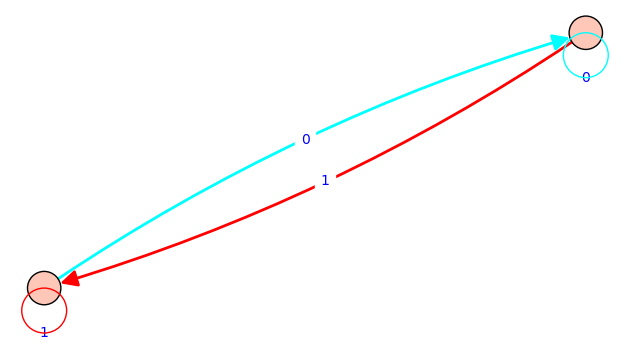

In [12]:
graph = DiGraph([('a','a',0), ('a','a',1)], loops=True, multiedges=True)
domain_vertices = ['a']
SimplicialSystem(graph).n_cover(1).plot(vertex_labels=False)
#SimplicialSystem(build_n_graph(graph, domain_vertices,1)).plot(vertex_labels=False)

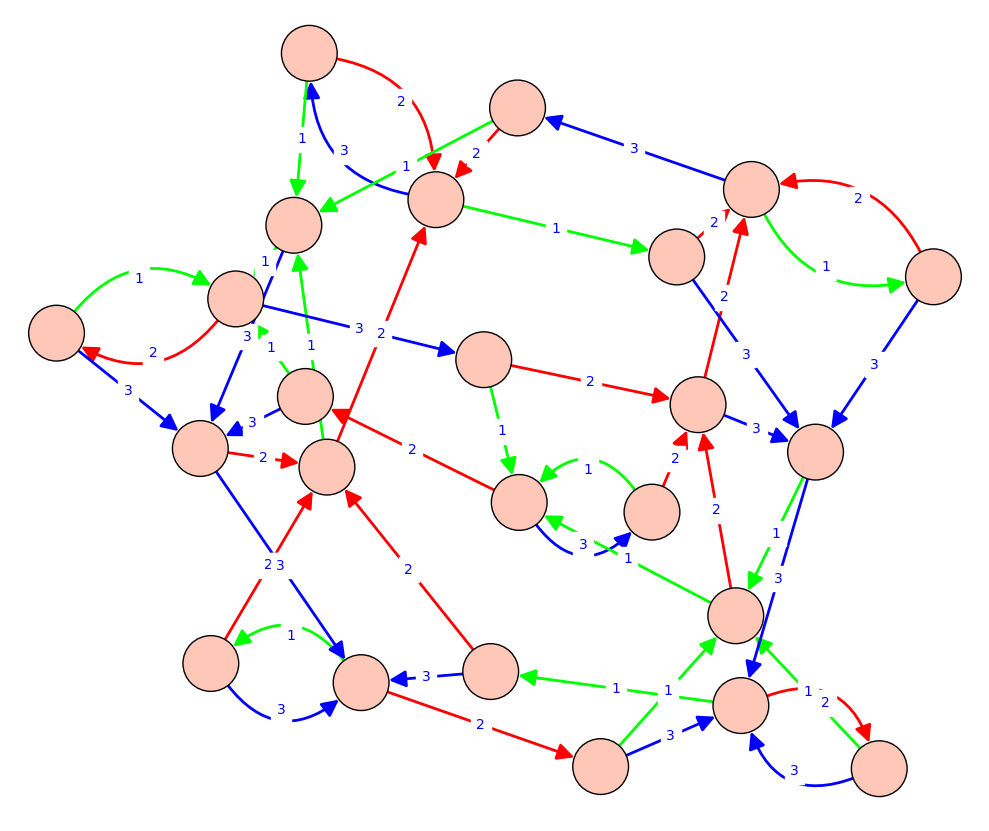

In [24]:
G.n_cover(1).plot(vertex_labels=False, figsize=(10,10))

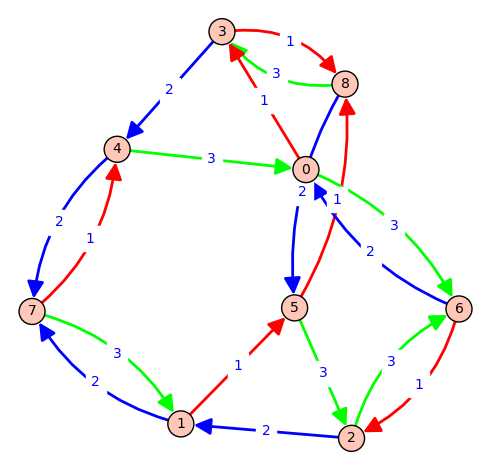

In [68]:
graph = G.dynamical_core()._G
domain_vertices = [0,3,4,1,2,5]
G.dynamical_core().plot()

In [59]:
d_graph = domain_graph(graph, domain_vertices)
domain_path = n_path(d_graph, 1)
domain_path

[[(0, 0, ((0, 6, 3), (6, 0, 2)))],
 [(0, 2, ((0, 6, 3), (6, 2, 1)))],
 [(0, 3, ((0, 3, 1),))],
 [(1, 1, ((1, 7, 2), (7, 1, 3)))],
 [(1, 4, ((1, 7, 2), (7, 4, 1)))],
 [(1, 5, ((1, 5, 1),))],
 [(2, 0, ((2, 6, 3), (6, 0, 2)))],
 [(2, 1, ((2, 1, 2),))],
 [(2, 2, ((2, 6, 3), (6, 2, 1)))],
 [(3, 3, ((3, 8, 1), (8, 3, 3)))],
 [(3, 4, ((3, 4, 2),))],
 [(3, 5, ((3, 8, 1), (8, 5, 2)))],
 [(4, 0, ((4, 0, 3),))],
 [(4, 1, ((4, 7, 2), (7, 1, 3)))],
 [(4, 4, ((4, 7, 2), (7, 4, 1)))],
 [(5, 2, ((5, 2, 3),))],
 [(5, 3, ((5, 8, 1), (8, 3, 3)))],
 [(5, 5, ((5, 8, 1), (8, 5, 2)))]]

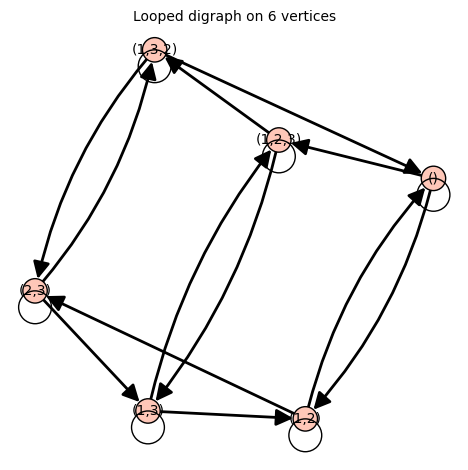

In [217]:
domain_graph(graph, domain_vertices)

The first one is on image sets, the second on iterates until the image set changes.

In [ ]:
def B_multiplicative(v, pos, return_next=False):
    # accelerate until the largest letter changes 
    # i.e. until next step permutation has a different first label
    next_pos, next_v = B_additive(v, G.pos)
    a = 1
    
    while next_pos(1) == pos(1):
        a += 1
        pos, v = next_pos, next_v
        next_pos, next_v = B_additive(v, G.pos)
    
    if return_next :
        return v, pos, next_pos
    return v, pos

In [96]:
def Brun_multiplicative(x):
    def f(x):
        return x-floor(x)
        
    if x[0] >= x[1]:
        return f(x[1]/x[0]), f(1/x[0])
    
    else:
        return f(1/x[1]), f(x[0]/x[1])

In [ ]:
def proj(v, pos):
    p = Permutations(len(v))(pos)
    w = T(p)*vector(v)
    ind = [i-1 for i in p]
    
    if p.signature() == 1:
        return(w[ind[2]]/w[ind[1]], w[ind[0]]/w[ind[1]])
    else:
        return(w[ind[0]]/w[ind[1]], w[ind[2]]/w[ind[1]])

    


In [14]:
x = [random() for _ in range(3)]
w = vector([sum(x[:3-n]) for n in range(3)])
w /= max(w)

for pos in ['()', '(1,2)']:
    v = T(permutation(pos)).inverse()*w
    
    vp, end_pos = mB(v, pos)
    #print(proj(vp,end_pos))
    
    v = {str(i+1): v[i] for i in range(3)}
    SS.pos = pos
    print(SS.path(20,v)[1])
    
for pos in ['(1,3,2)']:
    v = T(permutation(pos)).inverse()*w
    
    vp, end_pos = mB(v, pos)
    #print(proj(vp,end_pos))
    
    v = {str(i+1): v[i] for i in range(3)}
    SS.pos = pos
    print(SS.path(20,v)[1])

3(1)2(1)1(3)1(2)3(2)2(1)2(3)1(3)2(3)1(3)2(3)1(3)2(3)1(3)2(3)1(3)3(2)1(3)1(2)2(3)
3(2)2(1)1(3)1(2)3(2)2(1)2(3)1(3)2(3)1(3)2(3)1(3)2(3)1(3)2(3)1(3)3(2)1(3)1(2)2(3)
3(2)1(3)1(2)3(2)2(1)2(3)1(3)2(3)1(3)2(3)1(3)2(3)1(3)2(3)1(3)3(2)1(3)1(2)2(3)1(3)


In [175]:
#x = [random() for _ in range(3)]
w = vector([sum(x[:3-n]) for n in range(3)])
w /= max(w)
pos = '()'
v = T(permutation(pos)).inverse()*w
vp, end_pos = mB(v, pos)

print(w)
print(w[1:])
print(vp)
print(proj(vp,end_pos))
print(end_pos)
print(Brun(w[1:]))

(1.0, 0.7173540604586428, 0.21092919253634676)
(0.7173540604586428, 0.21092919253634676)
(0.2826459395413572, 0.506424867922296, 0.21092919253634676)
(0.29403777599235786, 0.39401176506988267)
()
(0.29403777599235786, 0.39401176506988267)


In [176]:
x = [random() for _ in range(3)]

w = vector([sum(x[:3-n]) for n in range(3)])
w /= max(w)
pos = '()'
end_pos = copy(pos)
v = T(permutation(pos)).inverse()*w
wb = w[1:]

print(v)
print(wb)

for _ in range(10):
    v, end_pos = mB(v, end_pos)
    print('step')
    print(end_pos)
    print(proj(v,end_pos))
    wb = Brun(wb)
    print(wb)


(1.0, 0.6973437599483253, 0.0967133875885408)
(0.7940571475368661, 0.0967133875885408)
step
()
(0.12179650783138457, 0.2593552027104857)
(0.12179650783138457, 0.25935520271048573)
step
(1,2)
(0.8557159815925691, 0.46961274174763395)
(0.8557159815925681, 0.4696127417476339)
step
()
(0.5487951047421598, 0.16861204127437776)
(0.5487951047421603, 0.168612041274379)
step
(1,2,3)
(0.3072404251010889, 0.8221736880649286)
(0.30724042510109084, 0.8221736880649266)
step
(1,3)
(0.21628801130039088, 0.3736928456372901)
(0.216288011300394, 0.3736928456372934)
step
(1,2)
(0.6759945010309608, 0.5787855288787683)
(0.6759945010309374, 0.5787855288787715)
step
()
(0.8561985755743, 0.47930197431324895)
(0.8561985755743344, 0.47930197431330024)
step
(1,2,3)
(0.5598023495796574, 0.16795335629850167)
(0.5598023495796948, 0.16795335629845476)
step
(1,3,2)
(0.3000225998061887, 0.786344771062281)
(0.3000225998060848, 0.7863447710621616)
step
(2,3)
(0.27170680953227433, 0.3815407831871065)
(0.2717068095324673, 

In [177]:
pp = permutation('(1,2)')

In [178]:
pp.cycle_string

<bound method Permutation.cycle_string of [2, 1, 3]>

In [179]:
permutation('(1,2,3)').signature()

1

In [290]:
def step(n, perm):
    a, b = str(perm[2]), str(perm[1])
    s = (a+b)*(n//2) + a*(n % 2) + str(perm[0])
    c = Permutation('(1,2)') if n%2 else Permutation('(1,2,3)')
    return s, c*perm

def path(l, pos='()'):
    perm = permutation(pos)
    res = ''
    for n in l:
        s, perm = step(n, perm)
        res += s
    return res

def p_matrix(l, pos='()'):
    SSpos = copy(SS)
    SSpos.pos = pos
    s = path(l, pos)
    M, N = SSpos.rauzy_matrix(s), SSpos.dual_matrix(s)
    return(M,N)

def max_ind(l):
    M, N = p_matrix(l)
    m1 = max(max(map(abs,M[i,:].list())) for i in range(3))
    m2 = max(max(map(abs,N[i,:].list())) for i in range(3))
    i1 = [(i+1,j+1) for i in range(3) for j in range(3) if M[i,j] == m1]
    i2 = [(i+1,j+1) for i in range(3) for j in range(3) if abs(N[i,j]) == m2]
    return (i1, i2)

def max_val(l):
    M, N = p_matrix(l)
    m1 = max(max(map(abs,M[i,:].list())) for i in range(3))
    m2 = max(max(map(abs,N[i,:].list())) for i in range(3))
    i1 = [(i+1,j+1) for i in range(3) for j in range(3) if M[i,j] == m1]
    i2 = [(i+1,j+1) for i in range(3) for j in range(3) if abs(N[i,j]) == m2]
    return (m1, m2)

def sum_val(l):
    M, N = p_matrix(l)
    m1 = sum(sum(map(abs,M[i,:].list())) for i in range(3))
    m2 = sum(sum(map(abs,N[i,:].list())) for i in range(3))
    i1 = [(i+1,j+1) for i in range(3) for j in range(3) if M[i,j] == m1]
    i2 = [(i+1,j+1) for i in range(3) for j in range(3) if abs(N[i,j]) == m2]
    return (m1, m2)

In [341]:
permutation('(1,3,2)').to_matrix()

[0 1 0]
[0 0 1]
[1 0 0]

In [412]:
v = vector([random() for _ in range(3)])
pos = '()'
v /= max(T(permutation(pos))*v)
w0 = T(permutation(pos))*v
print(w0)

q0 = vector([1/2-random() for _ in range(3)])
q0[2] = -1/v[2] * (v[0]*q0[0] + v[1]*q0[1])
q = copy(q0)

for _ in range(10):
    v, pos, next_pos = mB(v, pos, True)
    #print("Pos : " + str(permutation(str(pos))))
    #print(T(permutation(pos))*v)
    v_sorted = permutation(next_pos).to_matrix().inverse()*T(permutation(pos))*v
    print(v_sorted)

(0.2238161551490787, 1.0, 0.13896630248002467)
(-0.3894503877692693, -0.12108774304241066, 1.4985865475134235)
(0.2238161551490787, 0.13896630248002467, 0.10473537940368516)
(0.13896630248002467, 0.10473537940368516, 0.08484985266905404)
(0.10473537940368516, 0.08484985266905404, 0.034230923076339514)
(0.08484985266905404, 0.034230923076339514, 0.01988552673463112)
(0.034230923076339514, 0.01988552673463112, 0.01638800651637501)
(0.01988552673463112, 0.01638800651637501, 0.014345396341708394)
(0.01638800651637501, 0.014345396341708394, 0.0034975202182561116)
(0.014345396341708394, 0.0034975202182561116, 0.0020426101746666148)
(0.0034975202182561116, 0.0020426101746666148, 0.0003553154686839477)
(0.0020426101746666148, 0.0014549100435894968, 0.0003553154686839477)


In [292]:
def test_prod(t):
    a,b = max_val(t)
    if not b <= a:
        print("Wrong")
    
N = 10
for p in Partitions(N).list():
    test_prod(p)

In [355]:
sorted?

In [293]:
def odd_mat(n, perm):
    M = identity_matrix(SR,3)
    [a, b, c] = perm
    a -= 1
    b -= 1
    c -= 1
    M[a,a] = n+1
    M[b,a] = n
    M[c,a] = n+1
    M[a,b] = 1
    
    return M, Permutation('(1,2)')*perm

def even_mat(n, perm):
    M = identity_matrix(SR,3)
    [a, b, c] = perm
    a -= 1
    b -= 1
    c -= 1
    M[a,a] = n+1
    M[b,a] = n
    M[c,a] = n
    M[a,c] = 1
    
    return M, Permutation('(1,2,3)')*perm

def s_p_matrix(l, parity):
    perm = Permutation('(3)')
    M = identity_matrix(3)
    for i in range(len(l)):
        if parity[i] == 1:
            M0, perm = odd_mat(l[i], perm)
        else:
            M0, perm = even_mat(l[i], perm)
        M = M0*M
    return M

In [335]:
def test_ind(t):
    a,b = max_ind(t)
    if not min(ind[0] for ind in a) == 1:
        print("Wrong")
        print(t)
        print(min(ind[0] for ind in a))
    
N = 12
for p in Partitions(N).list():
    p = [1]*15 + [x-1 for x in p]
    test_ind(p)

Wrong
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 11]
2
Wrong
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 0]
2
Wrong
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1]
2
Wrong
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 0, 0]
2
Wrong
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 2]
2
Wrong
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 0]
2
Wrong
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 0, 0, 0]
2
Wrong
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 3]
2
Wrong
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 2, 0]
2
Wrong
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1]
2
Wrong
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 0, 0]
2
Wrong
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 0, 0, 0, 0]
2
Wrong
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 4]
2
Wrong
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 3, 0]
2
Wrong
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 2, 1]
2
Wrong
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 2, 0, 0

In [300]:
show(p_matrix([1,1])[0].transpose()^n)

[                             1/2*(-1/2*sqrt(5) + 3/2)^n*(sqrt(1/5) + 1) - 1/2*(1/2*sqrt(5) + 3/2)^n*(sqrt(1/5) - 1)                                                  sqrt(1/5)*(1/2*sqrt(5) + 3/2)^n - sqrt(1/5)*(-1/2*sqrt(5) + 3/2)^n                                                                                                                   0]
[-1/4*(-1/2*sqrt(5) + 3/2)^n*(sqrt(5) - 1)*(sqrt(1/5) + 1) - 1/4*(1/2*sqrt(5) + 3/2)^n*(sqrt(5) + 1)*(sqrt(1/5) - 1)              1/2*sqrt(1/5)*(1/2*sqrt(5) + 3/2)^n*(sqrt(5) + 1) + 1/2*sqrt(1/5)*(-1/2*sqrt(5) + 3/2)^n*(sqrt(5) - 1)                                                                                                                   0]
[-1/4*(-1/2*sqrt(5) + 3/2)^n*(sqrt(5) - 1)*(sqrt(1/5) + 1) - 1/4*(1/2*sqrt(5) + 3/2)^n*(sqrt(5) + 1)*(sqrt(1/5) - 1)          1/2*sqrt(1/5)*(1/2*sqrt(5) + 3/2)^n*(sqrt(5) + 1) + 1/2*sqrt(1/5)*(-1/2*sqrt(5) + 3/2)^n*(sqrt(5) - 1) - 1                                                                                                                   1]

In [313]:
phi = QQbar(golden_ratio)

In [317]:
phi??

In [245]:
l = [1]*50+[0]*60+[3]
print(SS.end_pos(path(l[:-1])))
print(max_ind(l)[0])

()
[(3, 2)]


In [220]:
for t in range(4,10):
    print(permutation(SS.end_pos(path([0]*(t-1))))[0])
    print(max_ind([0]*t)[0])

1
[(1, 3)]
2
[(2, 3)]
3
[(3, 3)]
1
[(1, 3)]
2
[(2, 3)]
3
[(3, 3)]


In [185]:
p_matrix([1]*13)

(
[233 377   0]  [ 233 -377    0]
[144 233   0]  [-144  233    0]
[233 376   1], [-145  233    1]
)

In [186]:
SS.pos = '()'

In [187]:
T(permutation('()'))*(p_matrix([0]*3)[0].transpose())

[1 1 1]
[1 2 3]
[1 1 2]

In [188]:
matrix([[1,0,1],[1,0,0],[0,1,0]])^3*T(permutation('()'))

[2 1 2]
[1 1 2]
[1 0 1]

In [189]:
SS.rauzy_matrix('123')

[1 1 1]
[0 1 1]
[1 1 2]

In [190]:
show(p_matrix([0]*3)[0])

[1 0 1]
[1 1 1]
[1 1 2]

In [191]:
p_matrix([2,10],pos='(1,2)')

(
[6 8 1]  [ 1 -2  1]
[5 7 1]  [ 0  1 -1]
[5 6 1], [-5  4  2]
)

In [192]:
P = Permutation('(1,2)(3)').to_matrix()

In [193]:
M,N = p_matrix([27,15])

In [194]:
N.transpose()*M

[-26903  -1934   -118]
[ 23822   1713    104]
[   118      8      1]

In [197]:
var('n,m')
s_p_matrix([n],[1,1]).subs([n==27//2, m==15//2])

[14  1  0]
[13  1  0]
[14  0  1]

In [199]:
show(s_p_matrix([n],[1]))
show(s_p_matrix([n],[0]))

[n + 1     1     0]
[    n     1     0]
[n + 1     0     1]

[n + 1     0     1]
[    n     1     0]
[    n     0     1]

In [207]:
show(s_p_matrix([0,0],[1,0]))

[1 1 0]
[1 1 1]
[1 0 1]

In [206]:
show(s_p_matrix([n,m],[1,0]))

[      m*n + n + 1             m + 1                 0]
[(m + 1)*n + n + 1             m + 1                 1]
[      m*n + n + 1                 m                 1]

In [265]:
for k in range(1,10):
    show(p_matrix([0]*k+[2])[0])

[1 1 1]
[1 2 1]
[0 1 1]

[1 0 2]
[1 1 2]
[1 1 3]

[3 1 4]
[2 1 2]
[2 1 3]

[3 2 4]
[4 3 5]
[2 2 3]

[3 2 5]
[4 3 6]
[5 4 8]

[ 8  5 12]
[ 5  3  7]
[ 6  4  9]

[ 9  6 13]
[12  8 17]
[ 7  5 10]

[10  7 15]
[13  9 19]
[17 12 25]

[25 17 37]
[15 10 22]
[19 13 28]

In [258]:
show(s_p_matrix([n,m],[1,1]))

[      m*n + n + 1             m + 1                 0]
[(m + 1)*n + n + 1             m + 2                 0]
[(m + 1)*n + n + 1             m + 1                 1]

In [235]:
max_val([1]*10)

(89, 89)

In [233]:
var('n,m,p,q')
show(s_p_matrix([n,m,p],[1,1,1,1]))

[(m + 1)*n + (m*n + n + 1)*(p + 1) + n + 1                   (m + 1)*(p + 1) + m + 2                                         0]
[      (m + 1)*n + (m*n + n + 1)*p + n + 1                         (m + 1)*p + m + 2                                         0]
[(m + 1)*n + (m*n + n + 1)*(p + 1) + n + 1                   (m + 1)*(p + 1) + m + 1                                         1]

In [92]:
matrix([5,3])

[5 2 0]
[7 3 0]
[7 2 1] [ 3 -7 -7]
[-2  5  4]
[ 0  0  1]

In [90]:
perm = Permutation('(3)')
var('n,m')
odd_mat(n,perm)

(
[n + 1     1     0]           
[    n     1     0]           
[    n     0     1], [2, 1, 3]
)

In [79]:
[a,b,c] = perm

In [63]:
matrix([11,37])

[ 96  19   0]
[101  20   0]
[101  19   1] [  20 -101 -101]
[ -19   96   95]
[   0    0    1]

In [65]:
37//2

18

In [71]:
18*5+2*5+1

101

In [59]:
test_prod([4,1])

5 3
([2, 0], [0, 1])


In [100]:
SS.end_pos(path([11]))

'(1,2)'

In [75]:
s = path([25,6,13,8,17,12,12])
M, N = SS.rauzy_matrix(s), SS.dual_matrix(s)
m1 = max(max(map(abs,M[i,:].list())) for i in range(3))
m2 = max(max(map(abs,N[i,:].list())) for i in range(3))
i1 = [(i+1,j+1) for i in range(3) for j in range(3) if M[i,j] == m1]
i2 = [(i+1,j+1) for i in range(3) for j in range(3) if abs(N[i,j]) == m2]
show(M,N.transpose())
show(perm(SS.end_pos(s)))
show(i1, i2)

[53930672 53817692 54721875]
[ 4249819  4240916  4312167]
[  152753   152433   154994] [ -17807  218027  221064]
[   -335    4093    4401]
[  17879 -218900 -222196]

[2, 1, 3]

[(1, 3)] [(3, 3)]

In [81]:
max_ind([13,24,12])

[3, 2, 1]

[(1, 1)] [(3, 2)]

In [82]:
max_ind([1,24,12])

[3, 2, 1]

[(2, 1)] [(1, 2)]

In [85]:
max_ind([1,1,12,4])

[3, 1, 2]

[(2, 2)] [(1, 1)]

In [87]:
max_ind([1,12,4,12])

[2, 1, 3]

[(2, 3)] [(1, 3)]

In [45]:
s = path([30,10,21])
M, N = SS.rauzy_matrix(s), SS.dual_matrix(s)
m1 = max(max(map(abs,M[i,:].list())) for i in range(3))
m2 = max(max(map(abs,N[i,:].list())) for i in range(3))
show(M,N)
show(m1), show(m2)

[ 991 1096 1081]
[  55   61   60]
[  11   12   12] [  12    0  -11]
[-180    1  164]
[-181   -5  171]

1096

181

(None, None)

In [46]:
s = path([30,10])
M, N = SS.rauzy_matrix(s), SS.dual_matrix(s)
m1 = max(max(map(abs,M[i,:].list())) for i in range(3))
m2 = max(max(map(abs,N[i,:].list())) for i in range(3))
show(M,N)
show(m1), show(m2)

[ 91 106  90]
[  5   6   5]
[  1   1   1] [  1   0  -1]
[-16   1  15]
[-10  -5  16]

106

16

(None, None)

In [39]:
N = 30
for p in Partitions(N).list():
    s = path(p)
    M, N = SS.rauzy_matrix(s), SS.dual_matrix(s)
    m1 = max(max(map(abs,M[i,:].list())) for i in range(3))
    m2 = max(max(map(abs,N[i,:].list())) for i in range(3))
    if m1 < m2:
        print("Nope")

In [3]:
Permutation('(1,2,3)').inverse()*Permutation('(3)')

[3, 1, 2]

In [10]:
lab = SS._step(label=True,inplace=False)
print(SS.pos)
print(lab)
print(SS.alphabet)
M = SS._step_rauzy_matrix(lab,inplace=False)

[1, 2, 3]
1
['1', '2', '3']


In [11]:
P = SS.plot_cotangent(1000,n_min=500,save='brun',frame=True)

In [12]:
SS.q

{'1': 4.9670012474837926e+85,
 '2': 8.37434548385131e+85,
 '3': 5.614604354404569e+85}

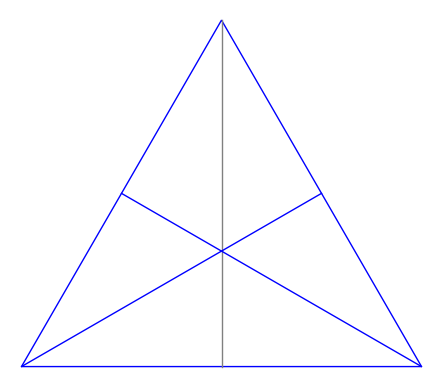

In [22]:
P[0] + line([proj*vector([1/2,1/2,0]), proj*vector([0,0,1])], color='grey') + line([proj*vector([1/2,0,1/2]), proj*vector([0,1,0])])+ line([proj*vector([0,1/2,1/2]), proj*vector([1,0,0])])

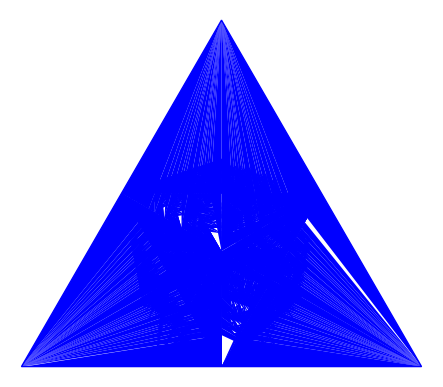

In [8]:
SS.IFS(11,leg=False)

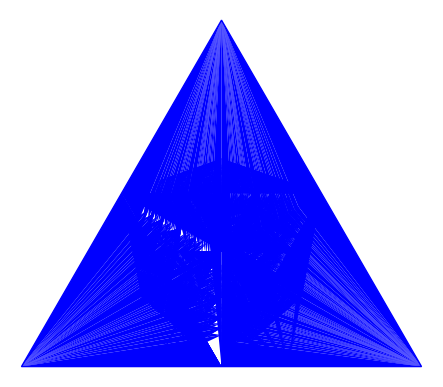

In [9]:
SS.IFS(12,leg=False)

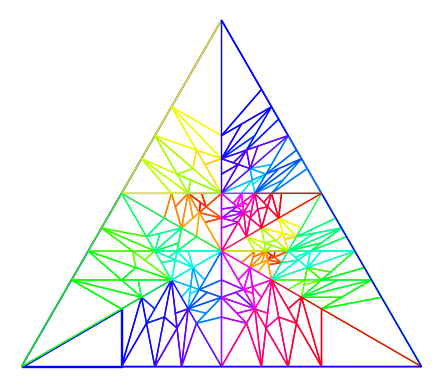

In [2]:
n = 7

SS.pos = str([1,2,3])
T1 = identity_matrix(3)
T1[1,2]=1
G1 = SS.decompose_simplex(n, leg=False, fill=False, T=T1)
SS.pos = str([1,3,2])
T2 = T1.transpose()
G2 = SS.decompose_simplex(n, leg=False, fill=False, T=T2)
G1 + G2

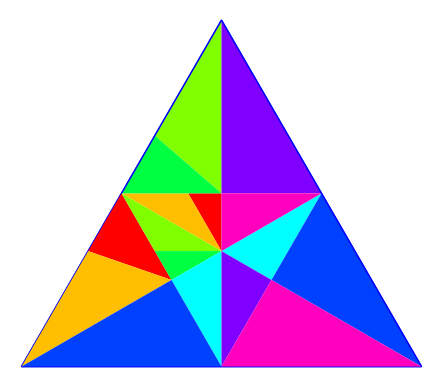

In [3]:
n = 3

SS.pos = str([2,3,1])
T1 = identity_matrix(3)
T1[2,0]=1
G1 = SS.decompose_simplex(3, leg=False, T=T1)
SS.pos = str([2,1,3])
T2 = T1.transpose()
G2 = SS.decompose_simplex(3, leg=False,T=T2)
G1 + G2

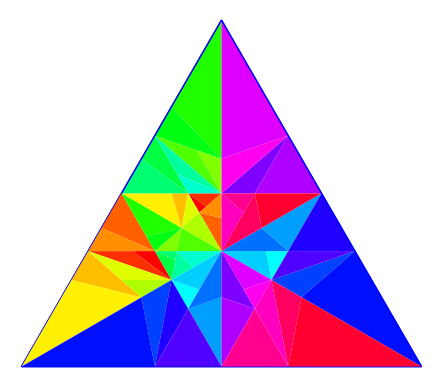

In [4]:
n = 5

SS.pos = str([2,3,1])
T1 = identity_matrix(3)
T1[2,0]=1
G1 = SS.decompose_simplex(n, leg=False, T=T1)
SS.pos = str([2,1,3])
T2 = T1.transpose()
G2 = SS.decompose_simplex(n, leg=False,T=T2)
G1 + G2

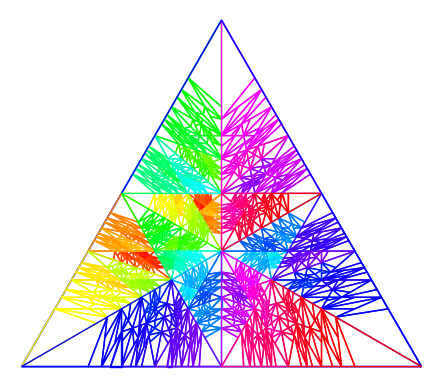

In [11]:
n = 10

SS.pos = str([2,3,1])
T1 = identity_matrix(3)
T1[2,0]=1
G1 = SS.decompose_simplex(n, leg=False, fill=False, T=T1)
SS.pos = str([2,1,3])
T2 = T1.transpose()
G2 = SS.decompose_simplex(n, leg=False, fill=False, T=T2)
G1 + G2